# Project Air Quality

## Domain Name: Environment Air qualities

### Abstract:

#### Contains the responses of a gas multisensor device deployed on the field in an Mumbai city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.

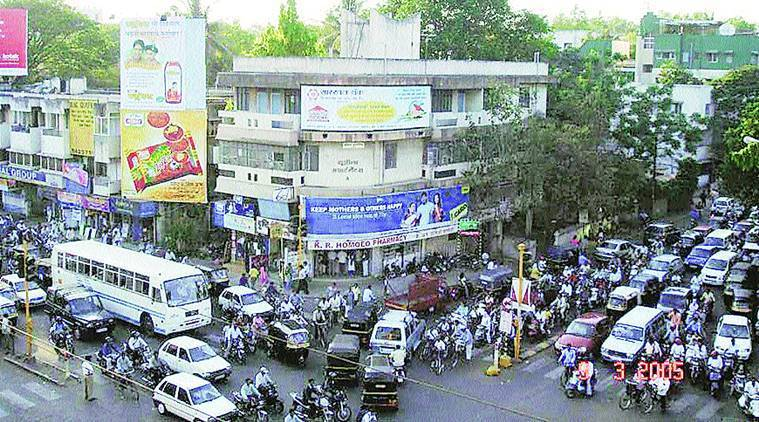

### importing the libraries

In [27]:
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Dataset: Air quality of an Mumbai city¶

### accessing the csv dataset in a dataframe

#### The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level, within an Mumbai city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

In [28]:
df=pd.read_csv("AirQualityUCI(1) (1).csv")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502
3,3/10/2004,21:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867
4,3/10/2004,22:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
5,3/10/2004,23:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848
6,3/11/2004,0:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603
7,3/11/2004,1:00,1,1136,31,3.3,672,62,1453,76,1333,730,10.7,60,0.7702
8,3/11/2004,2:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648
9,3/11/2004,3:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517


#### Attributes of the dataset are:

Sl No		Attribute		Description
0		Date		Date (DD/MM/YYYY)
1		Time		Time (HH.MM.SS)
2		CO(GT)		True hourly averaged concentration CO in mg/m^3 (reference analyzer)
3		PT08.S1(CO)		PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
4		NMHC(GT)		True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
5		C6H6(GT)		True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
6		PT08.S2(NMHC)		PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
7		NOx(GT)		True hourly averaged NOx concentration in ppb (reference analyzer)
8		PT08.S3(NOx)		PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
9		NO2(GT)		True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
10		PT08.S4(NO2)		PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
11		PT08.S5(O3)		PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
12		T		Temperature in Â°C
13		RH		Relative Humidity (%)
14		AH		AH Absolute Humidity

### Problem:¶

###### Humans are very sensitive to humidity, as the skin relies on the air to get rid of moisture. The process of sweating is your body's attempt to keep cool and maintain its current temperature. If the air is at 100-percent relative humidity, sweat will not evaporate into the air. As a result, we feel much hotter than the actual temperature when the relative humidity is high. If the relative humidity is low, we can feel much cooler than the actual temperature because our sweat evaporates easily, cooling us off. For example, if the air temperature e is 75 degrees Fahrenheit (24 degrees Celsius) and the relative humidity is zero percent, the air temperature feels like 69 degrees Fahrenheit (21 C) to our bodies. If the air temperature is 75 degrees Fahrenheit (24 C) and the relative humidity is 100 percent, we feel like it's 80 degrees (27 C) out.

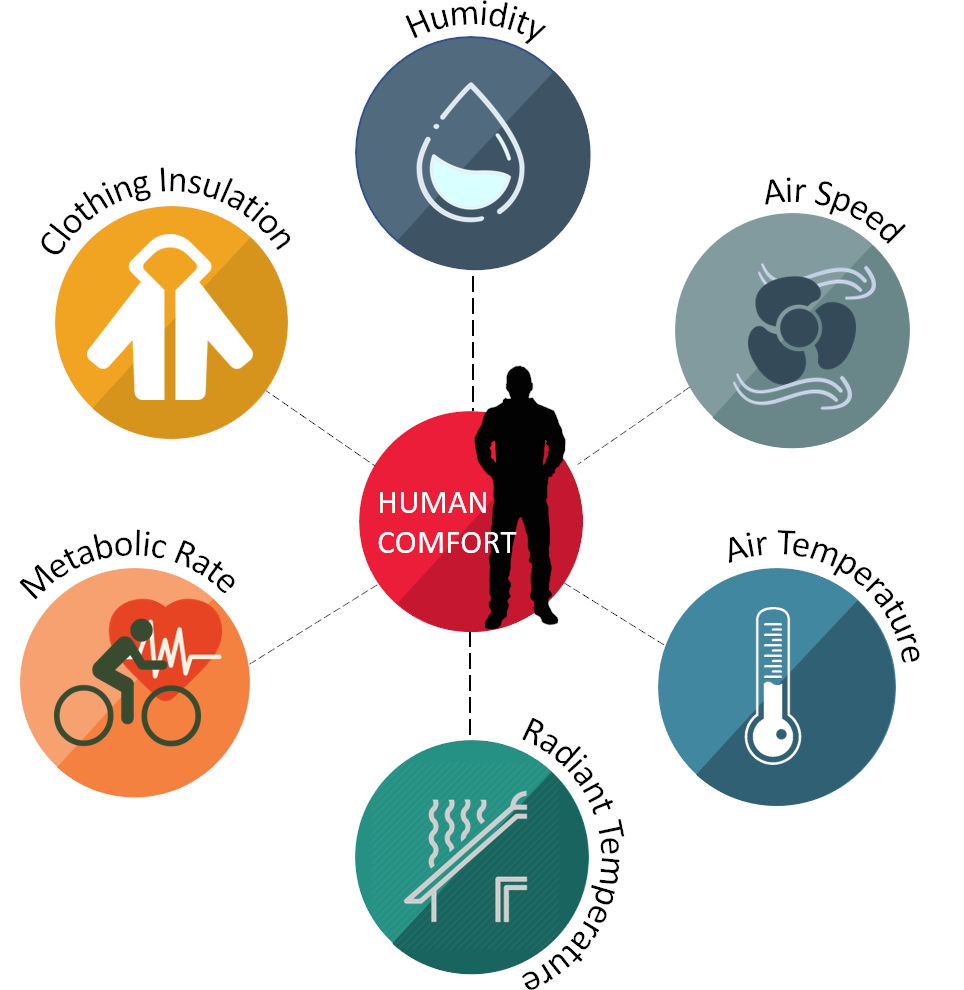

### Objective:


#### So we will predict the Relative Humidity of a given point of time based on the all other attributes affecting the change in RH.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null object
NMHC(GT)         9357 non-null object
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null object
NOx(GT)          9357 non-null object
PT08.S3(NOx)     9357 non-null object
NO2(GT)          9357 non-null object
PT08.S4(NO2)     9357 non-null object
PT08.S5(O3)      9357 non-null object
T                9357 non-null object
RH               9357 non-null object
AH               9356 non-null object
dtypes: object(15)
memory usage: 1.1+ MB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

df.describe()

In [30]:
df=pd.read_csv("AirQualityUCI(1) (1).csv",parse_dates=[['Date','Time']],index_col='Date_Time')
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
2004-03-10 19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502
2004-03-10 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867
2004-03-10 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [31]:
df["CO(GT)"] = df["CO(GT)"].astype(float)
df["PT08.S1(CO)"] = df["PT08.S1(CO)"].astype(float)
df["NMHC(GT)"] = df["NMHC(GT)"].astype(float)
df["C6H6(GT)"] = df["C6H6(GT)"].astype(float)
df["PT08.S2(NMHC)"] = df["PT08.S2(NMHC)"].astype(float)
df["NOx(GT)"] = df["NOx(GT)"].astype(float)
df["PT08.S3(NOx)"] = df["PT08.S3(NOx)"].astype(float)
df["NO2(GT)"] = df["NO2(GT)"].astype(float)
df["PT08.S4(NO2)"] = df["PT08.S4(NO2)"].astype(float)
df["PT08.S5(O3)"] = df["PT08.S5(O3)"].astype(float)
df["T"] = df["T"].astype(float)
df["RH"] = df["RH"].astype(float)
df["AH"] = df["AH"].astype(float)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9356 non-null float64
dtypes: float64(13)
memory usage: 1023.4 KB


In [33]:
df.shape

(9357, 13)

In [34]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9356.000000
mean,-34.033536,1047.656300,-158.293588,1.981650,893.534039,169.974351,793.947847,61.182858,1386.211713,970.912322,9.780186,39.559123,-6.816660
std,79.096080,331.873404,142.754434,43.618753,343.763662,259.704280,323.464112,139.767674,472.647278,459.749105,43.206219,51.948521,38.927625
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.000000,711.000000,50.000000,636.000000,53.000000,1180.000000,696.000000,10.900000,34.000000,0.692375
50%,1.500000,1053.000000,-200.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1443.000000,940.000000,17.200000,48.500000,0.976900
75%,2.600000,1221.000000,-200.000000,13.600000,1105.000000,286.000000,960.000000,133.000000,1660.000000,1252.000000,24.100000,61.900000,1.296650
max,1428.000000,2040.000000,1209.000000,1321.000000,2214.000000,2121.000000,2683.000000,1945.000000,2775.000000,2523.000000,57.200000,879.000000,4.000000


The describe() method is used for calculating some statistical data like count,percentile, mean and std and percentile of the Series or DataFrame.

### Detect the missing values


In [35]:

df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               1
dtype: int64

##### isna function is used for detecting missing values in the dataset,missing values get mapped to True and non missing value mapped to False.

In [36]:
df=df.dropna()

In [37]:
df.isna().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

##### now all the missing values are dropped.

## Data visualization


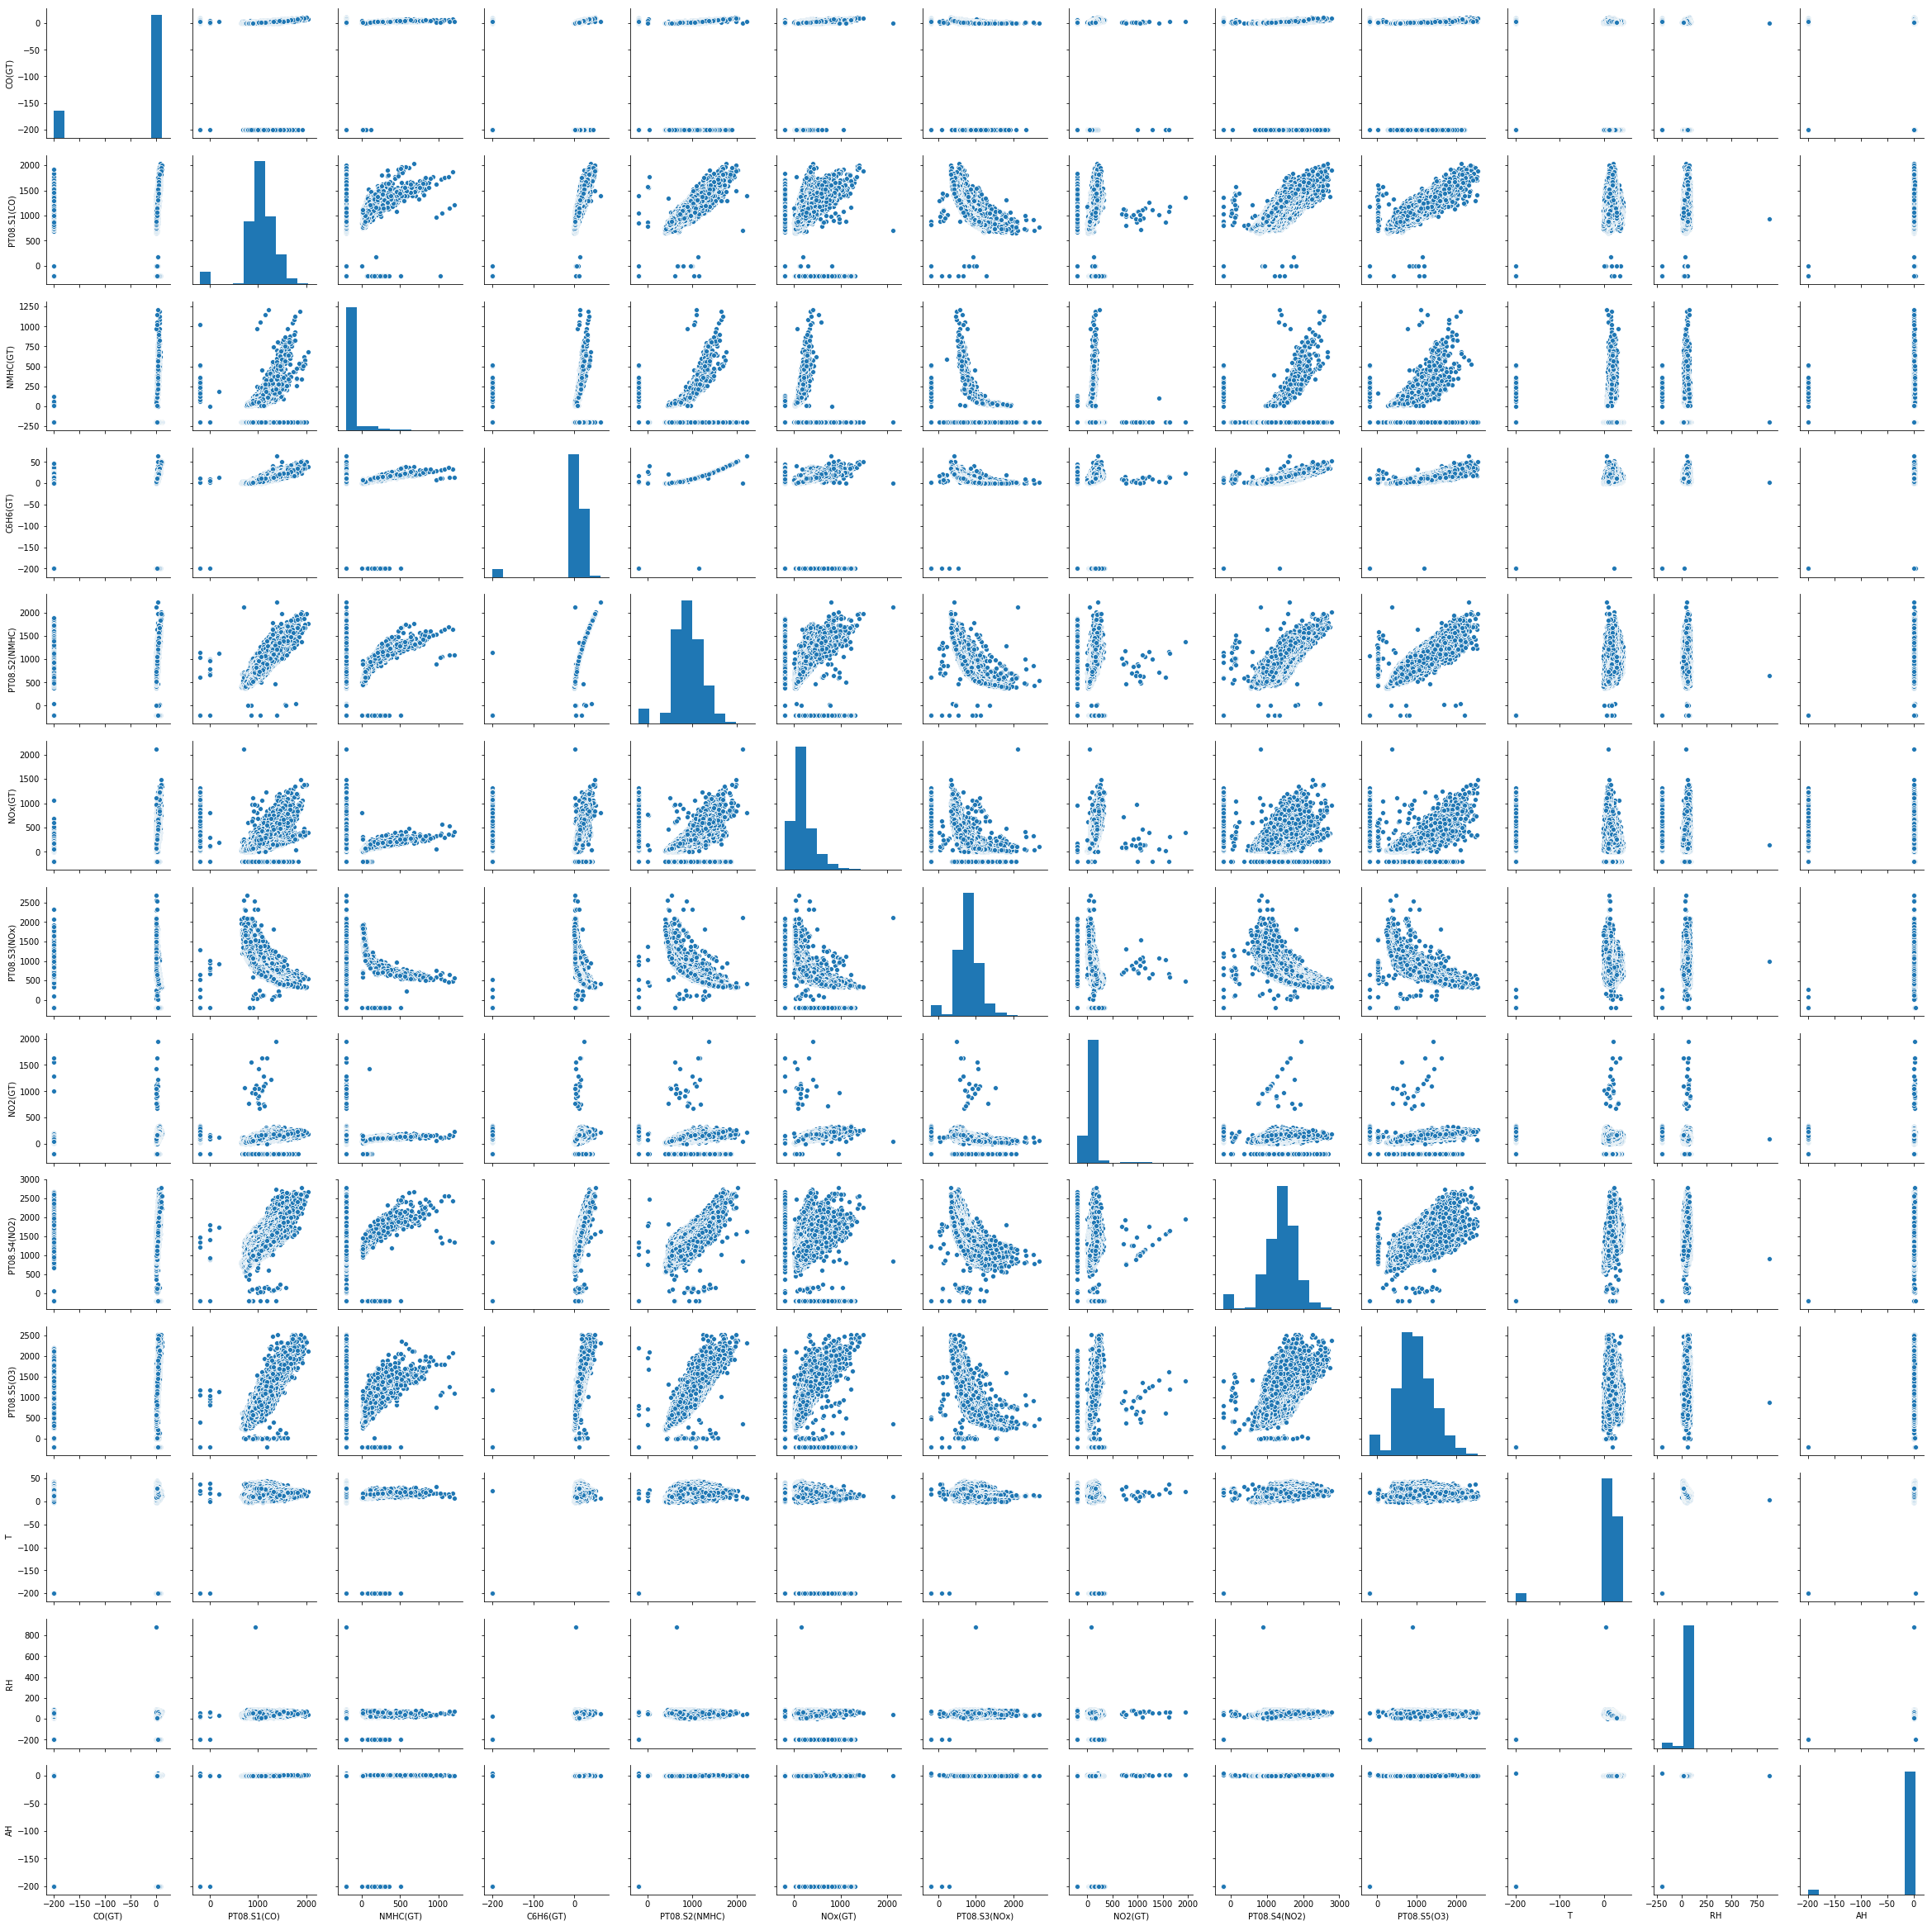

In [15]:

sns.pairplot(data=df)

In [38]:
x=df.drop(['RH'],axis=1)
y=df.RH

In [39]:
x

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
Date_Time,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888
2004-03-10 23:00:00,1.2,1197.0,38.0,4.7,750.0,89.0,1337.0,96.0,1393.0,949.0,11.2,0.7848
2004-03-11 00:00:00,1.2,1185.0,31.0,3.6,690.0,62.0,1462.0,77.0,1333.0,733.0,11.3,0.7603
2004-03-11 01:00:00,1.0,1136.0,31.0,3.3,672.0,62.0,1453.0,76.0,1333.0,730.0,10.7,0.7702
2004-03-11 02:00:00,0.9,1094.0,24.0,2.3,609.0,45.0,1579.0,60.0,1276.0,620.0,10.7,0.7648


In [40]:
y

Date_Time
2004-03-10 18:00:00    48.9
2004-03-10 19:00:00    47.7
2004-03-10 20:00:00    54.0
2004-03-10 21:00:00    60.0
2004-03-10 22:00:00    59.6
2004-03-10 23:00:00    59.2
2004-03-11 00:00:00    56.8
2004-03-11 01:00:00    60.0
2004-03-11 02:00:00    59.7
2004-03-11 03:00:00    60.2
2004-03-11 04:00:00    60.5
2004-03-11 05:00:00    56.2
2004-03-11 06:00:00    58.1
2004-03-11 07:00:00    59.6
2004-03-11 08:00:00    57.4
2004-03-11 09:00:00    60.6
2004-03-11 10:00:00    58.4
2004-03-11 11:00:00    57.9
2004-03-11 12:00:00    66.8
2004-03-11 13:00:00    76.4
2004-03-11 14:00:00    81.1
2004-03-11 15:00:00    79.8
2004-03-11 16:00:00    71.2
2004-03-11 17:00:00    67.6
2004-03-11 18:00:00    64.2
2004-03-11 19:00:00    69.3
2004-03-11 20:00:00    67.8
2004-03-11 21:00:00    64.0
2004-03-11 22:00:00    63.4
2004-03-11 23:00:00    60.8
                       ... 
2005-04-03 09:00:00    30.7
2005-04-03 10:00:00    23.7
2005-04-03 11:00:00    19.3
2005-04-03 12:00:00    16.4
2005-04-03

### Data Normalization



### Load libraries for Scaling Features

In [41]:

from sklearn.preprocessing import MinMaxScaler

m = MinMaxScaler()

m.fit(df)

norm_data = m.transform(df)

norm_data = pd.DataFrame(norm_data)
norm_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.956111,0.696429,0.248403,0.803565,0.516156,0.157691,0.435657,0.145921,0.635966,0.539111,0.873262,0.230677,0.984107
1,0.953280,0.666071,0.221434,0.794084,0.478459,0.130547,0.476587,0.136131,0.591261,0.430408,0.872036,0.229564,0.983949
2,0.954224,0.715179,0.204400,0.792567,0.471831,0.142611,0.464794,0.146387,0.589916,0.467866,0.866312,0.235403,0.984070
3,0.954224,0.703571,0.198722,0.793326,0.475559,0.160276,0.448144,0.150117,0.599664,0.515241,0.862633,0.240964,0.984249
4,0.951392,0.657143,0.178141,0.783087,0.429163,0.142611,0.487340,0.147319,0.568067,0.481087,0.863451,0.240593,0.984259


In [42]:
norm_data.columns =['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']

norm_data.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.956111,0.696429,0.248403,0.803565,0.516156,0.157691,0.435657,0.145921,0.635966,0.539111,0.873262,0.230677,0.984107
1,0.953280,0.666071,0.221434,0.794084,0.478459,0.130547,0.476587,0.136131,0.591261,0.430408,0.872036,0.229564,0.983949
2,0.954224,0.715179,0.204400,0.792567,0.471831,0.142611,0.464794,0.146387,0.589916,0.467866,0.866312,0.235403,0.984070
3,0.954224,0.703571,0.198722,0.793326,0.475559,0.160276,0.448144,0.150117,0.599664,0.515241,0.862633,0.240964,0.984249
4,0.951392,0.657143,0.178141,0.783087,0.429163,0.142611,0.487340,0.147319,0.568067,0.481087,0.863451,0.240593,0.984259


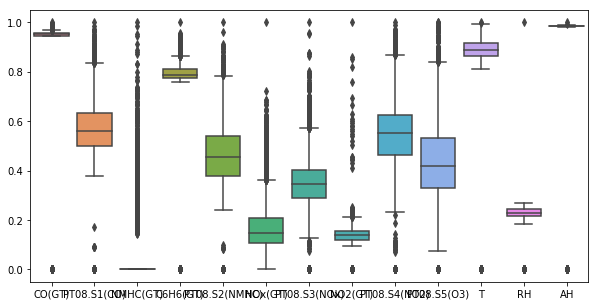

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(data=norm_data)
plt.show()

### Descriptive Statistics


In [43]:

norm_data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,0.782493,0.557049,0.029586,0.765418,0.453045,0.159386,0.344799,0.121678,0.533172,0.430046,0.857625,0.222023,0.946977
std,0.366411,0.148054,0.101313,0.157127,0.142335,0.111887,0.112146,0.064635,0.158879,0.168809,0.176638,0.048146,0.190822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.946673,0.500446,0.000000,0.773606,0.377382,0.107712,0.289976,0.117949,0.463866,0.329049,0.862224,0.216867,0.983786
50%,0.950920,0.559375,0.000000,0.788396,0.453604,0.146919,0.344780,0.137995,0.552269,0.418840,0.887980,0.230306,0.985181
75%,0.956111,0.634375,0.000000,0.810011,0.540597,0.209069,0.402359,0.155245,0.625210,0.533235,0.916190,0.242725,0.986748
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation


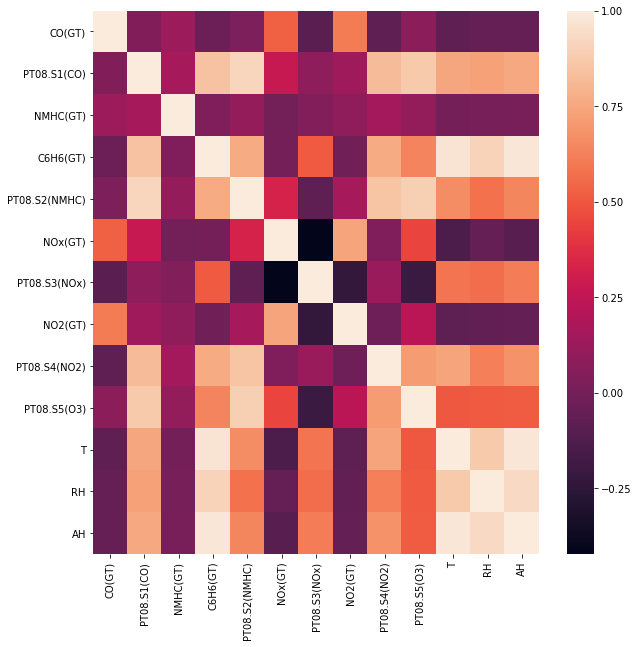

In [23]:

plt.figure(figsize=(10,10))
sns.heatmap(norm_data.corr())
plt.show()

## Graphical Visualization

### Simple Linear Regression 

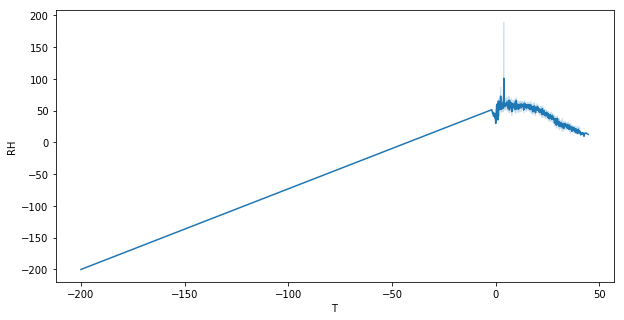

In [25]:
plt.figure(figsize=(10,5))
sns.lineplot(x="T",y='RH', data = df)
plt.show()

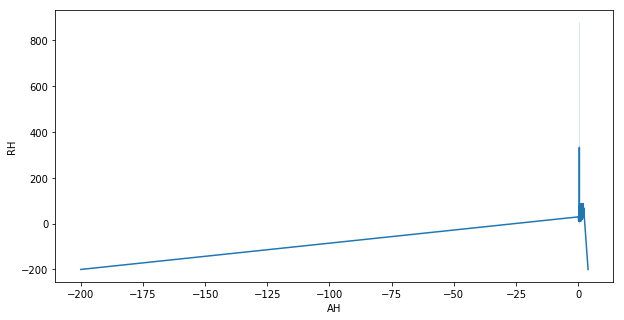

In [26]:
plt.figure(figsize=(10,5))
sns.lineplot(x="AH",y='RH', data = df)
plt.show()

# conclusion:
from above graph we can see before 0it is linearly decreased


# check Assumptions


# 1) Linearity

C:\Users\pp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


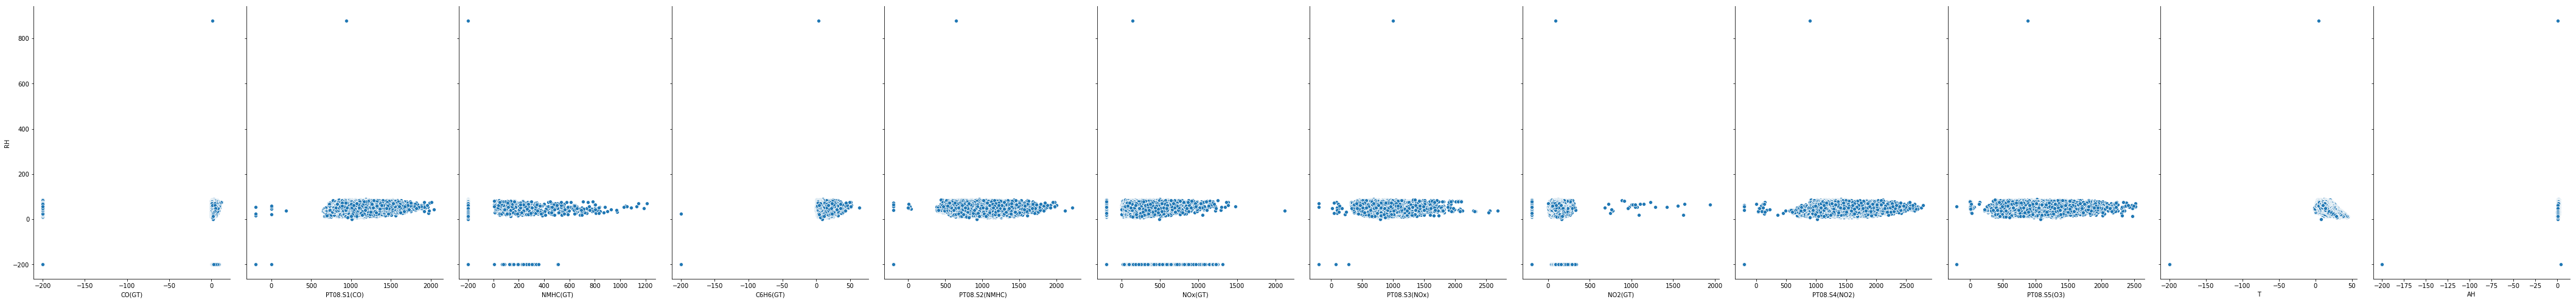

In [27]:
# visualize the relationship between the features and the response using scatterplots
plot= sns.pairplot(df, x_vars=['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'AH'], y_vars='RH', size=7, aspect=0.7)

# conclusion:
there is no linearity present.

# 2. Mean of Residuals¶

In [37]:
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.812853590075577e-15


# conclusion: 
Mean of Residuals is Very close to zero so all good here.


# 3. Check for Homoscedasticity

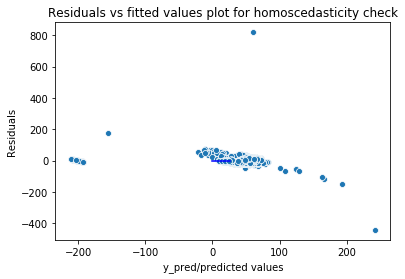

In [38]:
p = sns.scatterplot(y_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

# Goldfeld Quandt Test

# Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

Null Hypothesis: Error terms are homoscedastic
Alternative Hypothesis: Error terms are heteroscedastic.

In [39]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, x_train)
lzip(name, test)

[('F statistic', 0.536783061109416), ('p-value', 0.9999999999999999)]

# conclusion:
here p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic and its Good.

# 4. Check for Normality of error terms/residuals

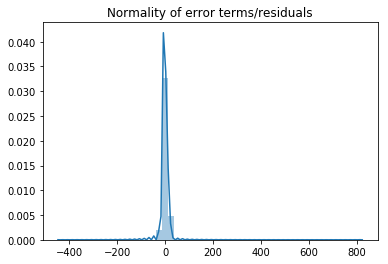

In [40]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [67]:
from scipy.stats import norm
import statsmodels.api as sm
import pylab as py

### Distribution Plot


In [ ]:
x = norm_data.drop('RH', axis=1)
y = norm_data[["RH"]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

### training model


In [ ]:
model = LinearRegression()

model.fit(x_train, y_train)

### making predictions


In [ ]:

y_pred = model.predict(x_test)

residual = y_test - y_pred

### plot


Text(0, 0.5, 'Frequency')

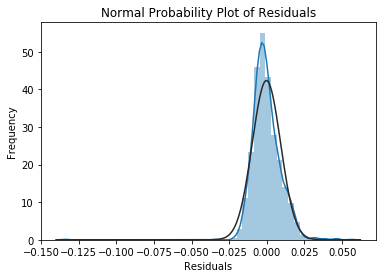

In [68]:

sns.distplot(residual, fit = norm)
plt.title("Normal Probability Plot of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

### Q-Q Plot


<Figure size 720x720 with 0 Axes>

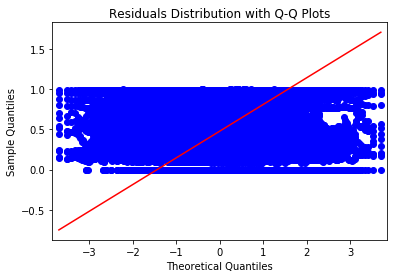

In [69]:

plt.figure(figsize=(10,10))
sm.qqplot(norm_data, line = 's')
py.title("Residuals Distribution with Q-Q Plots")
py.show()

# Conclusion :
From Normal distribution plot, we can say that our data is normally distributed


# 5. No autocorrelation of residuals

In [43]:
import statsmodels.api as sm

### autocorrelation


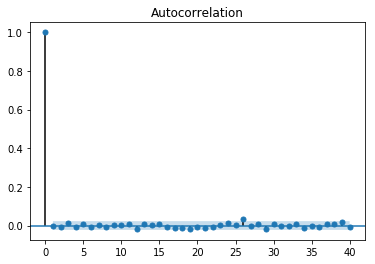

In [44]:
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

### partial autocorrelation


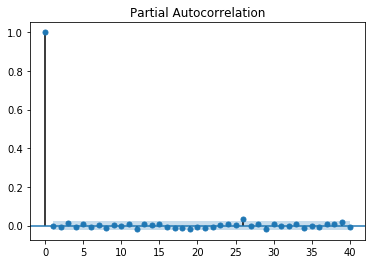

In [45]:
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.show()

### A Durbin Watson test uses the following null and alternative hypotheses:

#Null hypothesis (H0): First-order autocorrelation does not exist.

#Alternative hypothesis: (Ha): First-order autocorrelation exists.

### Importing statsmodels


In [73]:
from statsmodels.stats.stattools import durbin_watson

In [ ]:
dw = durbin_watson(norm_data)
dw

# if dw = 2 ; No Auto_correlation.  if 0<dw>2 ; Positive Autocorrelation.  if 2<dw>4 ; Negative Autocorrelation.

In [ ]:
array([0.0482579 , 0.01194246, 0.17916451, 0.00432664, 0.01996215,
       0.08993488, 0.016371  , 0.14576362, 0.01601697, 0.03040214,
       0.00363042, 0.00613262, 0.00378616])


# Conclusion :
when DW is near to 2 then No Autocorrelation, when DW between 0 to 2 then Positive Autocorrelation, when DW between 2 to 4 then Negative Autocorrelation.

so from above Dw values, we can say that; Positive Autocorrelation present in our dataset

# 6. No perfect multicollinearity

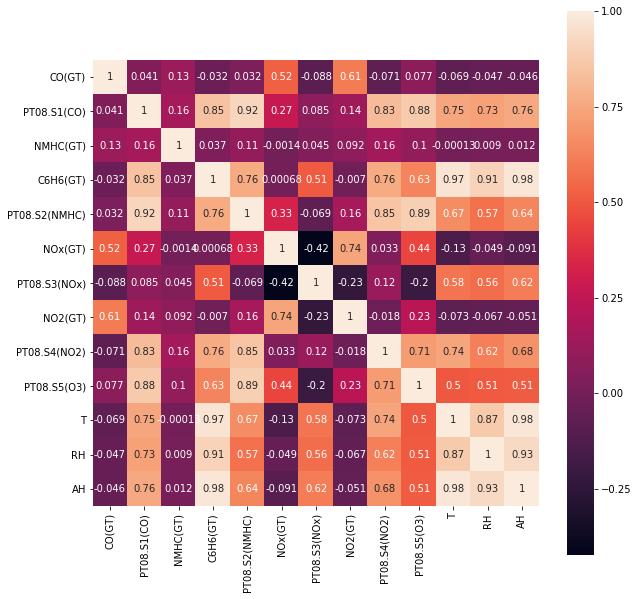

In [46]:
plt.figure(figsize=(10,10)) 
p=sns.heatmap(df.corr(), annot=True,square=True) 

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
X = norm_data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH']]
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(norm_data.values, i) for i in range(norm_data.shape[1])]
 
vif["features"] = norm_data.columns
 
print(vif)

     VIF Factor       features
0      9.383280         CO(GT)
1    252.365876    PT08.S1(CO)
2      1.491483       NMHC(GT)
3   4297.567611       C6H6(GT)
4    246.994424  PT08.S2(NMHC)
5     12.591658        NOx(GT)
6     58.390428   PT08.S3(NOx)
7     12.882903        NO2(GT)
8    104.327359   PT08.S4(NO2)
9     62.205759    PT08.S5(O3)
10  1816.764360              T
11   298.212543             RH
12  4467.111690             AH


# Conclusion :
IF VIF <= 4 then no multicollinearity. and VIF >= 10 then high multicollinearity.

In our dataset, we found no multicollinearity in only NMHC(GT) and we found high multicollinearity in remaining variables



# perform Linear Regression

In [44]:
x.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
Date_Time,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,0.7888


In [45]:
y.head()

Date_Time
2004-03-10 18:00:00    48.9
2004-03-10 19:00:00    47.7
2004-03-10 20:00:00    54.0
2004-03-10 21:00:00    60.0
2004-03-10 22:00:00    59.6
Name: RH, dtype: float64

In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
model.score(x,y)


0.9253541575533416

In [47]:
#splitting the data into Train and test dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [48]:
#applying linear reg model
model=LinearRegression()
model.fit(xtrain,ytrain)
#Prediction
ypred=model.predict(xtest)

data=pd.DataFrame({"Actual":ytest,"Predicted":ypred})
print(data)

                     Actual   Predicted
Date_Time                              
2004-05-16 23:00:00    28.5   39.585864
2004-10-01 02:00:00    70.8   56.183509
2004-11-13 06:00:00    61.8   54.376758
2004-12-29 14:00:00    46.8   53.730563
2004-05-31 13:00:00    24.4   24.833722
2004-11-29 19:00:00    57.0   51.238769
2004-11-06 10:00:00    61.3   50.654743
2005-03-25 15:00:00    47.8   50.391579
2005-03-27 19:00:00    83.6   69.914827
2004-03-12 01:00:00    59.7   58.097880
2005-03-09 03:00:00    53.1   63.684932
2005-02-06 00:00:00    39.2   53.582163
2004-10-18 10:00:00    49.3   45.020661
2004-10-21 07:00:00    64.8   54.503278
2004-09-09 20:00:00    30.7   27.949829
2004-12-01 09:00:00    78.3   58.108069
2004-10-12 04:00:00    67.5   53.799681
2004-06-07 08:00:00    44.2   53.284945
2004-10-22 03:00:00    67.3   54.983140
2004-09-13 08:00:00    61.8   57.877237
2005-02-28 11:00:00    43.3   56.583090
2004-07-24 06:00:00    50.5   51.169832
2004-08-20 08:00:00    54.9   56.304192


In [50]:
#Accuracy of Model
from sklearn.metrics import r2_score,mean_squared_error
r2_score(ytest,ypred)

0.7589787993494468

In [51]:
print("R square",model.score(xtrain,ytrain))
print("y interpret",model.intercept_)
print("slope",model.coef_)

R square 0.9654796221300337
y interpret 63.84513711922117
slope [-2.60905999e-03  1.40798418e-02 -1.53686985e-02 -5.01455909e-01
 -4.48014103e-02  1.58992773e-02 -1.92649733e-02 -2.81329154e-02
  4.45239366e-02 -4.02761040e-03 -1.90211708e+00  3.75602435e+00]


In [49]:
print("R square",model.score(xtest,ytest))
print("y interpret",model.intercept_)
print("slope",model.coef_)

R square 0.9580699907864328
y interpret 78.72541540375295
slope [-1.89624883e-03  1.57634438e-02 -1.36082293e-02  7.92169158e-01
 -7.62452691e-02  1.23219141e-02 -1.56503828e-02 -2.33688126e-02
  3.51374892e-02  7.99092401e-04 -1.46772348e+00  2.12850995e+00]


# conclusion:

### Regression analysis a model that describe the relation between the dependent variable and independent variable in a simplified mathematical function will best describe such relationship or simple assumption have made that is the case by using linear regression.After the Linear Regression analysis of the Data we got the accuracy of the prediction is 95%. It shows the increment in accuracy of given dataset.